# Map, Filter, Reduce

## Table of Contents
- Operating over lists
- Mapping
- Filtering
- Reducing

In [1]:
employees = [
    {"name": "Pedro", "office": "Madrid", "mail":"pedrolopez@company.com"},
    {"name": "Samantha", "office": "Valencia", "mail":"sammartinez@company.com"},
    {"name": "Ivan", "office": "Moscow", "mail":"ivanivanovich@company.com"},
    {"name": "Mary", "office": "New York", "mail":"marysmith@company.com"},
    {"name": "Juan", "office": "Madrid", "mail":"juan@company.com"},
    {"name": "Richard", "office": "New York", "mail":"richardjohnson@company.com"},
    {"name": "Adelia", "office": "Madrid", "mail":"adelia@company.com"},
    {"name": "Piotr", "office": "Moscow", "mail":"piotrpiotrovich@company.com"},
    {"name": "Stewart", "office": "New York", "mail":"stewart@company.com"},
]

In [2]:
madrid_mails = []
for person in employees:
    if person["office"] == "Madrid":
        madrid_mails.append(person["mail"])
print(madrid_mails)

['pedrolopez@company.com', 'juan@company.com', 'adelia@company.com']


In [3]:
madrid_mails

['pedrolopez@company.com', 'juan@company.com', 'adelia@company.com']

In [4]:
a = print("Hola todos")
print(a)

Hola todos
None


When we have collections of data, such as `lists` and want to operate them, we have many different options. We have already seen loops, both `for` and `while` that allows us to operate one by one on the elements of `iterables` (lists, tuples, range, etc.). 

Let's see a few examples:

In [5]:
# We can't join the elements of the following list because not all of them are strings.

phrase = ['There', 'are', 2, 'types', 'of', 'numbers', 'in', 'python,', 'integers', 'and', 'floats:', 7, 'and', 7.0]

In [6]:
" ".join(phrase)

TypeError: sequence item 2: expected str instance, int found

In [7]:
str(phrase)

"['There', 'are', 2, 'types', 'of', 'numbers', 'in', 'python,', 'integers', 'and', 'floats:', 7, 'and', 7.0]"

In [8]:
new_phrase = []
for word in phrase:
    new_phrase.append(str(word))

In [9]:
new_phrase

['There',
 'are',
 '2',
 'types',
 'of',
 'numbers',
 'in',
 'python,',
 'integers',
 'and',
 'floats:',
 '7',
 'and',
 '7.0']

In [10]:
" ".join(new_phrase)

'There are 2 types of numbers in python, integers and floats: 7 and 7.0'

Turns out this is by far not the only way to do this.... or...

## Tim Toady!
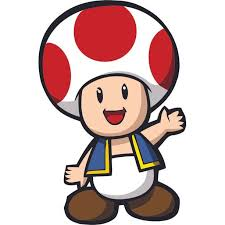

Tim Toady, aka [TIMTOWTDI](https://en.wikipedia.org/wiki/There%27s_more_than_one_way_to_do_it), is a programming acronym which means `There Is More Than One Way To Do It`.

Let's check a different one.

# Map

Well, there is actually a name in programming for applying an operation or function to all of the elements on an iterable. (Lists, tuples... also matrix, vector, Series. Things have different names on different languages or situations. Just think of an iterable as a collection of elements you can go through one by one (iterate) in an order.)

This operation we have just done with a for loop is called `mapping`. 

And as you'll hear (and say) many times as a programmer: "There is a function for that".

In [11]:
# map(function,iterable)
# function -> Operation we want to apply to each element

In [12]:
# Try it out

In [13]:
map(str,phrase)

![image.png](https://media.makeameme.org/created/wait-wut-5ad3f7.jpg)

### Weeeeell...... `It's complicated`.

In [14]:
# Short answer
list(map(str,phrase))

['There',
 'are',
 '2',
 'types',
 'of',
 'numbers',
 'in',
 'python,',
 'integers',
 'and',
 'floats:',
 '7',
 'and',
 '7.0']

In [15]:
# Slightly longer answer
# This is where minds are blown 🤯
# Not really important to fixate on this, but it's still cool.

In [16]:
import numpy as np
nums = np.random.random(5_000_000)

In [17]:
%%time
squares = []
for n in nums:
    squares.append(n**2)

CPU times: user 1.44 s, sys: 84.4 ms, total: 1.52 s
Wall time: 1.21 s


In [18]:
%%time
def square(x):
    return x**2
squares = map(square,nums)

CPU times: user 131 ms, sys: 8.27 ms, total: 140 ms
Wall time: 140 ms


In [19]:
squares

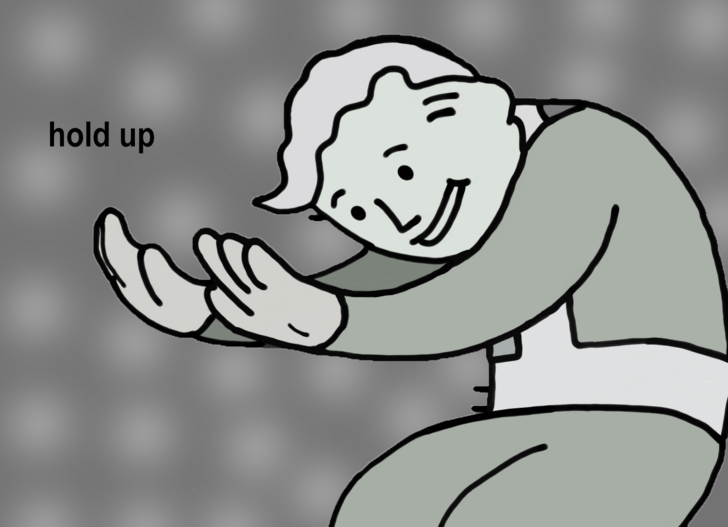

![image-4.png](https://i.imgflip.com/4tnzum.jpg)

In [20]:
%%time
def square(x):
    return x**2
squares = list(map(square,nums))

CPU times: user 1 s, sys: 24 ms, total: 1.02 s
Wall time: 1.03 s


### Note
There is no benefit in becoming efficiency-obsessed when learning to program.

`Efficiency is a product of accuracy.`

It is better to have a working program than a fast one.

### More examples

In [21]:
# Capitalize all the words:
phrase = "there is more than one way to do it"

In [22]:
phrase.title()

'There Is More Than One Way To Do It'

In [23]:
title_phrase = []
for word in phrase.split():
    title_phrase.append(word.capitalize())

In [24]:
" ".join(title_phrase)

'There Is More Than One Way To Do It'

In [25]:
phrase.split()

['there', 'is', 'more', 'than', 'one', 'way', 'to', 'do', 'it']

In [26]:
def cap(x):
    return x.capitalize()
" ".join(map(cap,phrase.split()))

'There Is More Than One Way To Do It'

In [27]:
?map

In [28]:
phrase2 = "Get only the first letter of each word to check the acronym"

In [29]:
list(map(cap,phrase2.split()))

['Get',
 'Only',
 'The',
 'First',
 'Letter',
 'Of',
 'Each',
 'Word',
 'To',
 'Check',
 'The',
 'Acronym']

In [30]:
grades = {
    "Pepe":[6,3,5],
    "Marieta":[9,8,9.5],
    "Adriana":[10,8,3]
}

In [31]:
suma_notas = map(sum,grades.values())

In [32]:
suma_notas

In [33]:
for i in suma_notas:
    print(i/3)

4.666666666666667
8.833333333333334
7.0


### Pandas
- DataFrames
- map -> apply

In [34]:
# Get the first 10 powers of 2
def power_2(n):
    return 2**n
list(map(power_2,range(10)))

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512]

In [35]:
lst = [1,2,3,4,5,6]

In [36]:
sum

<function sum(iterable, /, start=0)>

In [37]:
type(sum)

builtin_function_or_method

In [38]:
type(sum(lst))

int

In [39]:
functions = [square,power_2,str,int,float,print]

In [40]:
res = []
for func in functions:
    res.append( func(5) )

5


In [41]:
res

[25, 32, '5', 5, 5.0, None]

# Functions and call to functions:


- `function`:
    - the name of the function
    - the code this function executes ("the recipe")

- `call to function`:
    - function_name(args)
    - the result of running the function code
   

In [42]:
def five():
    return 5

In [43]:
print(type(five))
print(type(five()))

<class 'function'>
<class 'int'>


# Filter

There are more things you can do to a list than mapping. You've read the title already. 😜

Filtering is self explanatory, we will filter!

In [44]:
# Same old example, let's get only the odds
nums = range(1,101)
odds = []
for n in nums:
    if n%2 != 0:
        odds.append(n)

In [45]:
odds[:5]

[1, 3, 5, 7, 9]

In [46]:
odds = []
for n in nums:
    if n%2:
        odds.append(n)

In [47]:
odds[:5]

[1, 3, 5, 7, 9]

In [48]:
evens = []
for n in nums:
    if not n%2:
        evens.append(n)

In [49]:
evens[:5]

[2, 4, 6, 8, 10]

### `There's a function for that`

In [50]:
# filter(function,iterable)
# function -> a function that will evaluate or value as True or False for a given condition

In [51]:
def is_odd(x):
    return x%2 != 0

In [52]:
filter(is_odd,range(1,101))

In [53]:
odds = list(filter(is_odd,range(1,101)))
odds[:5]

[1, 3, 5, 7, 9]

In [54]:
# list(range(1,101,2))

Let's shake it up a bit.

Filter a list of 500 random integers to take only the prime numbers

In [55]:
nums = np.random.randint(1,1000,500)

In [56]:
def is_prime(n):
    if n <=1:
        return False
    for div in range(2,n//2):
        if n%div == 0:
            return False
    return True

In [57]:
primes = filter(is_prime,nums)

In [58]:
primes = list(primes)

In [59]:
primes[:5]

[127, 239, 919, 467, 433]

In [60]:
len(primes)

87

Last but not least...


# Reduce

If `filtering` is opening the cupboard and taking out `only` the ingredients `that meet a certain condition`, i.e.: that are in your recipe.

And `mapping` is `applying an operation to each` of the ingredients, e.g.: weighing them or chopping them.

Then `reduce` is finally `processing everything as a whole` and cooking it all into a single meal.

What does it mean? It means that we will begin with a collection of elements and process them "one by one" until we have a single result.

Unlike the previous ones, we must import `reduce` before using it.

In [61]:
from functools import reduce

In [62]:
# reduce(function,iterable,accumulator)
# function -> Must be a function with two arguments
# accumulator -> The initial value

![image-5.png](https://iamit.in/assets/reduce/reduce.png)

In [63]:
# Lets try summing all the numbers
nums = range(1,11)
suma = 0
for n in nums:
    suma = suma + n
suma

55

In [64]:
def add(a,b):
    return a+b

In [65]:
reduce(add,nums)

55

In [66]:
# Starting somewhere else
nums = range(1,11)
suma = 5
for n in nums:
    suma = suma + n
suma

60

In [67]:
reduce(add,nums,5)

60

## 6! = 6\*5\*4\*3\*2\*1
## n! = ∏ n, n-1, n-2, ...., n-(n-2),1

In [68]:
# Can we write a function for factorial using reduce?
# reduce(function,iterable,accumulator)

In [69]:
n = 10
nums = range(1,n+1)
def mult(a,b):
    return a*b

In [70]:
reduce(mult,nums)

3628800

In [71]:
def factorial(n):
    return reduce(mult,range(1,n+1))

In [72]:
factorial(10)

3628800

In [73]:
factorial(130)

6466855489220473672507304395536485253155359447828049608975952322944781961185526165512707047229268452925683969240398027149120740074042105844737747799459310029635780991774612983803150965145600000000000000000000000000000000

In [74]:
# How about the fibbonacci sequence?
# 0, 1, 1, 2, 3, 5, 8, 13

In [75]:
fibb = [0,1]
for i in range(10):
    fibb.append(sum(fibb[-2:]))
fibb

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

In [76]:
fibb = [0,1]
for _ in range(10): # When not using a variable, by convention we name it _ sometimes
    fibb.append(sum(fibb[-2:]))
fibb

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

In [77]:
def append_fibb(arr,_):
    arr.append(sum(arr[-2:]))
    return arr

In [78]:
reduce(append_fibb,range(10),[0,1])

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

# Conclusions

`map,filter,reduce` are high order functions. They receive a function as one of their arguments.

- Map: Will return the same number of elements as the original iterable
- Filter: Will return between 0 and the same number of elements as the original iterable
- Reduce: Will return a single element (but that element can be a list, for example)

![image-6.png](https://i.imgur.com/EqIyF7E.png)